# Machine learning for sentiment classification on movie reviews

This project aims at compare several classification algorithms and textual data representations with their parameters, on a dataset of movies reviews classified as positive or negative.
We experiment a representation as token counts (CountVectorizer) and 4 classification algorithms:
 - Multinomial Naive Bayes
 - Logistic regression
 - SVM
 - bi-directionnal LSTM

In [1]:
# load common librairies
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## Load data

First the data is transformed into pandas dataframes by some file manipulation. We use the Polarity dataset v2.0 of [Bo Pang and Lillian Lee, ACL 2004], which is available at: http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

In [3]:
# load dedicated library
import os

In [4]:
# preprocessing: prepare data
col_names = ['content', 'label']
pos = pd.DataFrame(columns = col_names)
neg = pd.DataFrame(columns = col_names)

In [5]:
# add positive samples to the DataFrame structure
i=1
for fend in os.listdir('./dataset1/pos/'):
    #data = pd.read_csv('./dataset1/pos/'+fend, sep = None, header = None)
    file = open('./dataset1/pos/'+fend, 'r')
    data = file.read()
    #print(data)
    file.close()
    pos = pos.append(pd.DataFrame({'content':[data], 'label':int(1)}, index=[i]))
    i+=1
# add negative samples to the DataFrame structure
i=1
for fend in os.listdir('./dataset1/neg/'):
    #data = pd.read_csv('./dataset1/neg/'+fend, sep = None, header = None)
    file = open('./dataset1/neg/'+fend, 'r')
    data = file.read()
    file.close()
    neg = neg.append(pd.DataFrame({'content':[data],'label':int(-1)}, index=[i]))
    i+=1

In [6]:
# convert label to a numerical variable
#reviews["label_num"] = reviews.label.map({"1":int(1), "-1":int(0)})
pos["label_num"] = pos['label'].astype(int)
neg["label_num"] = neg['label'].astype(int)

In [7]:
# print
print('pre-processing done')
print('number of positive samples: {} '.format(len(pos)))
print('number of negative samples: {} '.format(len(neg)))
print()
print('last positive samples:')
print(pos.tail(5))
print()
print('last negative samples:')
print(neg.tail(5))

pre-processing done
number of positive samples: 1000 
number of negative samples: 1000 

last positive samples:
                                                content label  label_num
996   now , lets first look into the history of shar...     1          1
997   call 911 for the cliche police if you must , b...     1          1
998   is it just me , or have disney films gradually...     1          1
999   it must be some sort of warped critical nightm...     1          1
1000  those print and television ads trumpeting that...     1          1

last negative samples:
                                                content label  label_num
996   synopsis : al simmons , top-notch assasin with...    -1         -1
997   the kids in the hall are an acquired taste . \...    -1         -1
998   david spade has a snide , sarcastic sense of h...    -1         -1
999   i've never written a review for a movie i have...    -1         -1
1000  deceiver is a plot twist in search of a movie ...    -1

## Prepare learning datasets

Then we mix the 2 dataframes of positive and negative samples into 2 random dataframes dedicated to training and testing. We verified that the random split was always done in the same way (with the same seed) to ensure that the results are the same every time we run the code.

In [9]:
# concat positive and negative samples
reviews = pos.append(neg)

In [10]:
# define X (items) and y (labels)
X = reviews.content
y = reviews.label_num

In [11]:
# split randomly X and y into train and test sets (NB: always uses the same seed)
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.25)

In [12]:
# print
print('number of train samples: {}'.format(len(X_train)))
print('number of test samples: {}'.format(len(X_test)))
print()
print('first train samples with their labels:')
print(X_train.head(10))
print(y_train.head(10))
#print()
#print('first test samples with their labels:')
#print(X_test.head(10))
#print(y_test.head(10))

number of train samples: 1500
number of test samples: 500

first train samples with their labels:
651    after bloody clashes and independence won , lu...
105    alexander dumas' the three musketeers is one o...
562    no , i did not read the novel by thomas hardy ...
644    billy bob thornton , who had a sudden rise to ...
442    george little ( jonathan lipnicki ) wants a li...
629    fantastically over hyped , godzila finally lum...
997    the kids in the hall are an acquired taste . \...
681    titantic , writer and director james cameron's...
813    synopsis : captain picard and the crew of the ...
505    i think maybe it's time for the batman series ...
Name: content, dtype: object
651    1
105   -1
562    1
644    1
442    1
629   -1
997   -1
681    1
813    1
505   -1
Name: label_num, dtype: int64


## Representing text as numerical data (vectorization)

In order to use text as input of the classification algorithms, we need to convert it into fixed-size numerical feature vectors. To do so we use scikit-learn CountVectorizer that "converts text into a matrix of token counts", or "bag of words". It first learns the vocabulary over the text given as input, and then transforms any textual data into a document-term matrix using the fitted vocabulary. We learn the vocabulary on the training dataset, and compute the document-term matrix representations for both training and testing data. The basic method uses the input token as such in the vocabulary, but it's also possible to use methods of natural language processing to use more elaborated tokens.

In [13]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [14]:
# learn the "vocabulary" of the training data (occurs in-place)
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.33, max_features=None, min_df=10,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
# examine the fitted vocabulary
vocabulary = vect.get_feature_names()
print('number of words in the vocabulary: {} '.format(len(vocabulary)))
vocabulary

number of words in the vocabulary: 7836 


['000',
 '10',
 '10 minutes',
 '10 scale',
 '10 scale scale',
 '100',
 '100 million',
 '1000',
 '101',
 '11',
 '12',
 '13',
 '13th',
 '14',
 '15',
 '15 minutes',
 '16',
 '17',
 '18',
 '19',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1972',
 '1973',
 '1977',
 '1978',
 '1979',
 '1980',
 '1980s',
 '1981',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '19th century',
 '20',
 '20 minutes',
 '200',
 '2000',
 '2001',
 '2001 space',
 '2001 space odyssey',
 '20th',
 '20th century',
 '21',
 '22',
 '24',
 '25',
 '30',
 '30 minutes',
 '3000',
 '35',
 '40',
 '45',
 '50',
 '50s',
 '60',
 '60s',
 '70',
 '70s',
 '80',
 '80s',
 '85',
 '90',
 '90 minute',
 '90 minutes',
 '90210',
 '90s',
 '95',
 '97',
 '99',
 'aaron',
 'abandon',
 'abandoned',
 'abilities',
 'ability',
 'able',
 'able make',
 'ably',
 'aboard',
 'abound',
 'absence',
 'absent',
 'absolut

In [16]:
# transform training data into a "document-term matrix'
X_train_dtm = vect.transform(X_train)
X_train_dtm

<1500x7836 sparse matrix of type '<class 'numpy.int64'>'
	with 299857 stored elements in Compressed Sparse Row format>

In [17]:
# examine the content of the sparse matrix
print(X_train_dtm)

  (0, 78)	1
  (0, 95)	1
  (0, 172)	1
  (0, 317)	1
  (0, 324)	1
  (0, 434)	1
  (0, 489)	1
  (0, 769)	1
  (0, 904)	1
  (0, 1034)	1
  (0, 1050)	1
  (0, 1228)	1
  (0, 1284)	1
  (0, 1360)	1
  (0, 1432)	1
  (0, 1444)	1
  (0, 1516)	2
  (0, 1804)	1
  (0, 1905)	1
  (0, 2010)	1
  (0, 2131)	1
  (0, 2514)	1
  (0, 2533)	1
  (0, 2573)	1
  (0, 2593)	1
  :	:
  (1499, 5891)	1
  (1499, 5906)	2
  (1499, 5967)	2
  (1499, 5996)	2
  (1499, 6004)	1
  (1499, 6153)	1
  (1499, 6357)	1
  (1499, 6359)	1
  (1499, 6386)	1
  (1499, 6400)	1
  (1499, 6568)	1
  (1499, 6652)	1
  (1499, 6826)	1
  (1499, 6871)	1
  (1499, 6963)	1
  (1499, 7195)	1
  (1499, 7286)	1
  (1499, 7376)	1
  (1499, 7507)	1
  (1499, 7513)	1
  (1499, 7583)	1
  (1499, 7599)	1
  (1499, 7619)	1
  (1499, 7620)	1
  (1499, 7688)	1


In [18]:
# examine the vocabulary and document-term matrix together (X_train_dtm.toarray() converts sparse matrix to a dense matrix)
pd.DataFrame(X_train_dtm.toarray(), columns=vect.get_feature_names())

,000,10,10 minutes,10 scale,10 scale scale,100,100 million,1000,101,11,...,younger brother,youth,zane,zany,zero,zeta,zeta jones,zombie,zone,zooms
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<500x7836 sparse matrix of type '<class 'numpy.int64'>'
	with 95631 stored elements in Compressed Sparse Row format>

## Class prediction with Multinomial Naive Bayes

The first classifier we test here is a classical one for textual data represented as bag of words, and the combination of these two was a reference until the explosion of deep learning. So it's a good start to have a feeling of the performance we can get on our dataset. The use is really simple with scikit-learn, since it stands in 3 lines for the training and 1 line for a prediction on test data. More, this method has the advantage to have really low computation time, and not to require lots of training data like deep learning methods. It has 3 parameters (from scikit-learn documentation):
 - alpha: additive (Laplace/Lidstone) smoothing parameter (default=1.0, 0 for no smoothing)
 - fit_prior: whether to learn class prior probabilities or not. If false, a uniform prior will be used (default=True)
 - class_prior: enables to give one's own prior probabilities to the classes. If specified the priors are not adjusted according to the data (default=None)

Here we already know that the 2 classes are equaly distributed, so the fit_prior parameter has no impact: we will get the same results by computing prior probabilities or by imposing a uniform distribution. And we don't try other priors either as it would give worse results. However alpha has a real impact that we evaluate in the next.

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [18]:
# import scikit-learn library
from sklearn.naive_bayes import MultinomialNB

In [19]:
# instantiate a Multinomial Naive Bayes model
alpha = 2 #(default=1.0, 0 for no smoothing)
MNB = MultinomialNB(alpha, False)

In [20]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time MNB.fit(X_train_dtm, y_train)

Wall time: 27.8 ms


MultinomialNB(alpha=2, class_prior=None, fit_prior=False)

In [21]:
# make class predictions for X_test_dtm
y_pred_class = MNB.predict(X_test_dtm)

### Performance evaluation

We evaluate each classifier with common metrics: accuracy and area under ROC curve, and also compute the confusion matrix.

In [22]:
# calculate accuracy of class predictions
accuracy_MNB = metrics.accuracy_score(y_test, y_pred_class)
print('accuracy is: {}'.format(accuracy_MNB))

accuracy is: 0.814


In [23]:
# calculate predicted probabilities for X_test_dtm and AUC
y_pred_prob = MNB.predict_proba(X_test_dtm)[:, 1]
AUC_MNB = metrics.roc_auc_score(y_test, y_pred_prob)
print('area under ROC curve is: {}'.format(round(AUC_MNB,3)))

area under ROC curve is: 0.886


In [24]:
# print the confusion matrix
conf_mat_MNB = metrics.confusion_matrix(y_test, y_pred_class)
print('confusion matrix is:')
print(conf_mat_MNB)

confusion matrix is:
[[198  47]
 [ 46 209]]


In [25]:
# print reviews for the false positives
FP_MNB = X_test[(y_pred_class==1) & (y_test==-1)]
print('there are {} false positive samples:'.format(len(FP_MNB)))
print(FP_MNB)

there are 47 false positive samples:
683    often similar to a little boy lost in a park t...
822    it's difficult to expect much from a director ...
927    star wars : ? episode i -- the phantom menace ...
762    weighed down by tired plot lines and spielberg...
403    in the interest of being generous , i want to ...
481    as any reasonable human being would , i must a...
87     lucas was wise to start his star wars trilogy ...
315    since director steven zaillian previously wrot...
238    there is a scene early in jakob the liar that ...
29     a follow-up to disney's live-action " 101 dalm...
541    whether or not i would be considered a trekker...
244    i read the new yorker magazine and i enjoy som...
168    so , it's thirty years later , and oscar and f...
263    it's not a bad thing to update old stories . \...
603    by phil curtolo " madonna - antonio banderas -...
633    guilt . guilt is something i felt while watchi...
268    i have always been a fan of director neil jo

In [26]:
# print reviews for the false negatives
FN_MNB = X_test[(y_pred_class==-1) & (y_test==1)]
print('there are {} false negative samples:'.format(len(FN_MNB)))
print(FN_MNB)

there are 46 false negative samples:
448    what is a scary movie anyhow ? \nis it a movie...
632    what surprises me most about the long-awaited ...
283    ok , let's get one thing straight right away :...
694    let me first say that the conditions that i wa...
305    one of the best things about my job is that , ...
656    jacques tati's 1953 classic " les vacances de ...
127    i have to say it . \ntim burton's retelling of...
237    jerry springer has got nothing on " wild thing...
373    okay , let me first say , this is a beavis and...
995    a thriller set in modern day seattle , that ma...
987    i think the first thing this reviewer should m...
701    let me start off by saying that leading up to ...
556    harmless , silly and fun comedy about dim-witt...
762    film adaptation of hunter s . thompson's infam...
349    bob the happy bastard's quickie review : \nthe...
390    when i left the theater after seeing david lyn...
271    this british import follows the ( mis- ) adv

### Tuning parameter with cross-validation

We evaluate the impact of the parameter alpha and try to find the best value with 1D grid search cross-validation.

In [27]:
# define the parameters
alpha_range = [1.0e-10, 0.25, 0.5, 1, 1.5, 2, 3, 4, 6, 8] #0 not accepted in MultinomialNB and automatically mapped to 1.0e-10
param_grid = dict(alpha=alpha_range)

In [28]:
# operate grid search with default RBF kernel
grid = GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=3, return_train_score=True)
%time grid.fit(X_train_dtm, y_train)

Wall time: 535 ms


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-10, 0.25, 0.5, 1, 1.5, 2, 3, 4, 6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [29]:
# print results
print("The best alpha is %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
scores = grid.cv_results_['mean_test_score']
scores

The best alpha is {'alpha': 6} with a score of 0.81


array([0.75333333, 0.80533333, 0.80533333, 0.80533333, 0.80333333,
       0.80466667, 0.80666667, 0.806     , 0.80733333, 0.806     ])

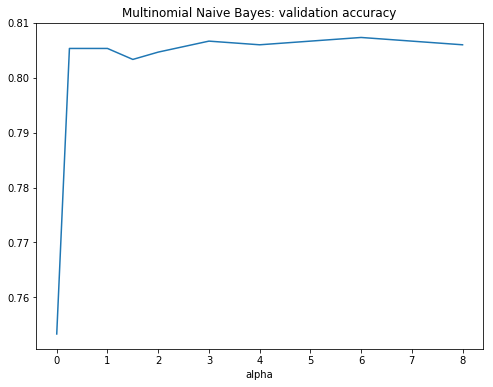

In [30]:
# plot scores
plt.figure(figsize=(8, 6))
plt.plot(alpha_range, scores)
plt.xlabel('alpha')
plt.title('Multinomial Naive Bayes: validation accuracy')
plt.show()

## Class prediction with logistic regression

A second common classification method is logistic regression, which is also provided by scikit-learn. The main parameters are (from scikit-learn documentation):
 - solver: algorithm to use in the optimization problem, among ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ (default: ‘liblinear’, but will be changed to 'lbfgs' in scikit-learn v0.22)
 - max_iter: maximum number of iterations taken for the solvers ‘newton-cg’, ‘sag’ and ‘lbfgs’ to converge
 - penalty: norm used in the penalization (‘l1’ or ‘l2’, default: ‘l2’).
 - dual: use of dual or primal formulation (default: False). Dual formulation is only implemented for l2 penalty.
 - tol: tolerance for stopping criteria (default: 1e-4)
 - C: inverse of regularization strength (default: 1.0). Like in SVMs, smaller values specify stronger regularization.
 - fit_intercept: whether a constant (a.k.a. bias or intercept) should be added to the decision function (default: True), with another particular parameter (intercept_scaling) for the solver ‘liblinear’.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
# import and instantiate a logistic regression model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [32]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 596 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

### Performance evaluation

In [34]:
# calculate accuracy
accuracy_LogReg = metrics.accuracy_score(y_test, y_pred_class)
print('accuracy is: {}'.format(accuracy_LogReg))

accuracy is: 0.82


In [35]:
# calculate predicted probabilities for X_test_dtm and area under ROC curve
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
AUC_LogReg = metrics.roc_auc_score(y_test, y_pred_prob)
print('area under ROC curve is: {}'.format(round(AUC_LogReg,3)))

area under ROC curve is: 0.903


In [36]:
# print the confusion matrix
conf_mat_LogReg = metrics.confusion_matrix(y_test, y_pred_class)
print('confusion matrix is:')
print(conf_mat_LogReg)

confusion matrix is:
[[206  39]
 [ 51 204]]


### Test with another solver

The default solver for logistic regression will be changed to 'lbfgs' in scikit-learn v0.22. So it may be useful to try it.

In [37]:
# instantiate a logistic regression model 
logreg = LogisticRegression(solver='lbfgs', max_iter=300)

In [38]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 231 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [40]:
# calculate accuracy
accuracy_LogReg = metrics.accuracy_score(y_test, y_pred_class)
print('accuracy is: {}'.format(accuracy_LogReg))

accuracy is: 0.818


In [41]:
# calculate predicted probabilities for X_test_dtm and area under ROC curve
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
AUC_LogReg = metrics.roc_auc_score(y_test, y_pred_prob)
print('area under ROC curve is: {}'.format(round(AUC_LogReg,3)))

area under ROC curve is: 0.902


In [42]:
# print the confusion matrix
conf_mat_LogReg = metrics.confusion_matrix(y_test, y_pred_class)
print('confusion matrix is:')
print(conf_mat_LogReg)

confusion matrix is:
[[205  40]
 [ 51 204]]


### Tuning parameters with cross-validation

We optimize the choice for the regularization parameter C with cross-validation for the liblinear solver and for the lbfgs solver.

In [43]:
C_range = np.logspace(-5, 8, 14)
param_grid = dict(C=C_range)
param_grid

{'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
        1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08])}

In [44]:
# operate grid search with liblinear
grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=param_grid, cv=3, return_train_score=True)
%time grid.fit(X_train_dtm, y_train)

Wall time: 4.66 s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [45]:
# print results
print("The best C is %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
scores = grid.cv_results_['mean_test_score']
scores

The best C is {'C': 0.1} with a score of 0.82


array([0.60066667, 0.69      , 0.79266667, 0.81333333, 0.81533333,
       0.81466667, 0.808     , 0.80533333, 0.78866667, 0.78266667,
       0.77866667, 0.77866667, 0.77866667, 0.77866667])

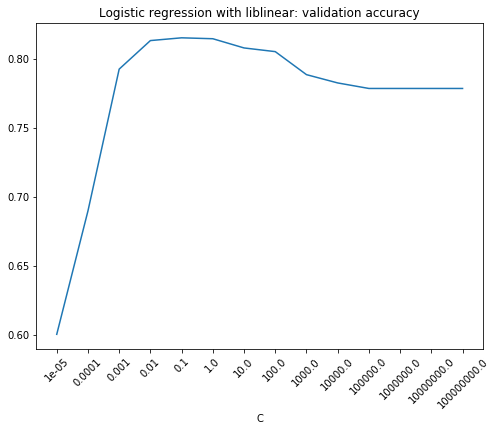

In [46]:
# plot scores
plt.figure(figsize=(8, 6))
plt.plot(scores)
plt.xticks(np.arange(len(C_range)), C_range, rotation=45)
plt.xlabel('C')
plt.title('Logistic regression with liblinear: validation accuracy')
plt.show()

In [47]:
# operate grid search with lbfgs
grid = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=300), param_grid=param_grid, cv=3, return_train_score=True)
%time grid.fit(X_train_dtm, y_train)

Wall time: 5.22 s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=300, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [48]:
# print results
print("The best C is %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
scores = grid.cv_results_['mean_test_score']
scores

The best C is {'C': 0.1} with a score of 0.82


array([0.54133333, 0.73333333, 0.77533333, 0.81333333, 0.818     ,
       0.80933333, 0.80666667, 0.804     , 0.8       , 0.808     ,
       0.806     , 0.80733333, 0.80733333, 0.80733333])

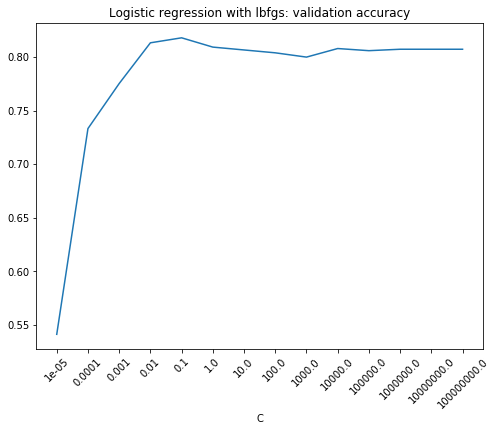

In [49]:
# plot scores
plt.figure(figsize=(8, 6))
plt.plot(scores)
plt.xticks(np.arange(len(C_range)), C_range, rotation=45)
plt.xlabel('C')
plt.title('Logistic regression with lbfgs: validation accuracy')
plt.show()

## Class prediction with SVM

SVM were also a state-of-the-art method for many classification problems before deep learning. That's why we use it at a third classifier. They have several parameters, whose principals are (from scikit-learn documentation):
 - kernel: we tried the linear kernel and the default RBF kernel
 - C: penalty parameter C of the error term
 - gamma: Kernel coefficient for RBF kernel

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [50]:
# import, instantiate and train a SVM model without probability estimation
from sklearn.svm import SVC
clf = SVC(kernel='linear')
%time clf.fit(X_train_dtm, y_train)

Wall time: 6.27 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [51]:
# make class predictions for X_test_dtm
y_pred_class = clf.predict(X_test_dtm)

### Performance evaluation

In [52]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

0.804

In [53]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[200,  45],
       [ 53, 202]], dtype=int64)

In [54]:
# import, instantiate and train a SVM model with probability estimation
clf = SVC(kernel='linear', probability=True)
%time clf.fit(X_train_dtm, y_train)

Wall time: 32 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [55]:
# calculate predicted probabilities for X_test_dtm
y_pred_prob = clf.predict_proba(X_test_dtm)[:, 1]

In [56]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.887843137254902

### Tuning parameters with cross-validation

We optimize the choice for the penalty parameter C and the kernel coefficient gamma with RBF kernel, by using a 2D grid-search cross-validation.

In [57]:
# 1st step: large logarithmic grid search
C_range = np.logspace(0, 10, 6)
gamma_range = np.logspace(-11, -1, 6)
param_grid = dict(gamma=gamma_range, C=C_range)

In [58]:
# operate grid search with default RBF kernel
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3, return_train_score=True)
%time grid.fit(X_train_dtm, y_train)

Wall time: 13min 19s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-11, 1.e-09, 1.e-07, 1.e-05, 1.e-03, 1.e-01]), 'C': array([1.e+00, 1.e+02, 1.e+04, 1.e+06, 1.e+08, 1.e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
# print results
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
scores

The best parameters are {'C': 10000.0, 'gamma': 1e-05} with a score of 0.79


array([[0.50333333, 0.50333333, 0.50333333, 0.50333333, 0.75066667,
        0.50466667],
       [0.50333333, 0.50333333, 0.50333333, 0.792     , 0.78333333,
        0.50466667],
       [0.50333333, 0.50333333, 0.794     , 0.79466667, 0.78333333,
        0.50466667],
       [0.50333333, 0.78266667, 0.79333333, 0.79466667, 0.78333333,
        0.50466667],
       [0.50333333, 0.75133333, 0.79333333, 0.79466667, 0.78333333,
        0.50466667],
       [0.50333333, 0.75      , 0.79333333, 0.79466667, 0.78333333,
        0.50466667]])

In [60]:
# Utility function to move the midpoint of a colormap to be around the values of interest
# from http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
from matplotlib.colors import Normalize
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)
    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

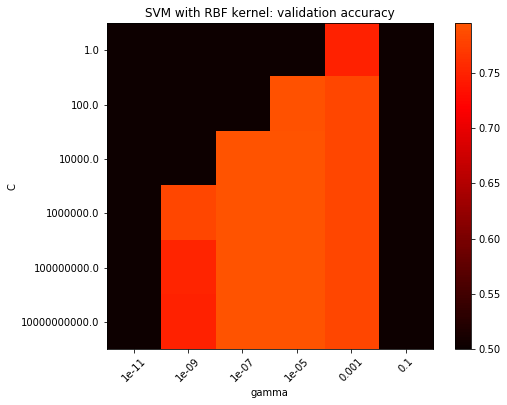

In [61]:
# draw heatmap ()
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.5, midpoint=0.8))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('SVM with RBF kernel: validation accuracy')
plt.show()

In [62]:
# 2nd step: precise logarithmic grid search on a more precise range
C_range = np.logspace(4, 8, 5)
gamma_range = np.logspace(-8, -4, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(kernel='linear'), param_grid=param_grid)
param_grid

{'gamma': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04]),
 'C': array([1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08])}

In [63]:
# operate grid search with default RBF kernel
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3, return_train_score=True)
%time grid.fit(X_train_dtm, y_train)

Wall time: 8min 39s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04]), 'C': array([1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [64]:
# print results
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),len(gamma_range))
scores

The best parameters are {'C': 10000.0, 'gamma': 0.0001} with a score of 0.80


array([[0.53733333, 0.794     , 0.79466667, 0.79466667, 0.79666667],
       [0.79266667, 0.794     , 0.79333333, 0.79466667, 0.79666667],
       [0.78733333, 0.79333333, 0.79333333, 0.79466667, 0.79666667],
       [0.77933333, 0.79333333, 0.79333333, 0.79466667, 0.79666667],
       [0.77266667, 0.79333333, 0.79333333, 0.79466667, 0.79666667]])

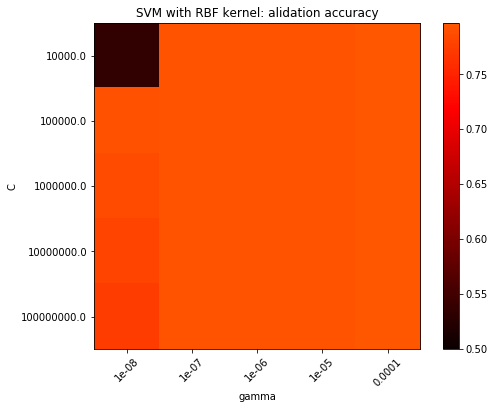

In [65]:
# draw heatmap
plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot, norm=MidpointNormalize(vmin=0.5, midpoint=0.8))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('SVM with RBF kernel: alidation accuracy')
plt.show()

## Class prediction using bidirectional LSTM

As another method of classification, we used a bidirectional LSTM (<a href=https://maxwell.ict.griffith.edu.au/spl/publications/papers/ieeesp97_schuster.pdf>Schuster and al, 1997</a>). The difference with a simple LSTM is that it agregates the result of a first LSTM whose input is gathered from left to right with another LSTM whose input is gathered from right to left. The purpose is to outperform the performance of a simple LSTM.

For this purpose, we used KERAS, a framework that makes use of Tensorflow (or Theano) for python3. In order to fulfil the motivations of reproducible research, both tensorflow (used by KERAS) and numpy seeds are explicitly set.

However we figured out that this method wasn't adapted to our problem since it's dedicated to prediction on sequences, and there's no link between the different samples here (the reviews and their classes). We could have use it to predict the content of a review which is a sequence of words/caracters, but it wouldn't have had interest either.

In [20]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

#Seeds of KERAS and numpy frozen here
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Using TensorFlow backend.


In [21]:
#to bypass out of memory error on GPU: we run this session on CPU only
#If the gpu has a large enough amount of memory, the content of this cell can be discarded
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = set_session(tf.Session(config=config))

In [92]:
# Reshape the arrays for the lstm
y_tr = y_train.values.reshape(1, y_train.shape[0], 1)
X_tr = X_train_dtm.toarray().reshape(1, X_train_dtm.shape[0], X_train_dtm.shape[1])
y_ts = y_test.values.reshape(1, y_test.shape[0], 1)
X_ts = X_test_dtm.toarray().reshape(1, X_test_dtm.shape[0], X_test_dtm.shape[1])

#In a terminal, we can launch a tool called tensorboard wich monitor the loss diminution and other variables.
#    tensorboard --logdir path_to_current_folder/Graph 

# Create a tensorflow callback in order for tensorboard to vizualise the diminishing loss
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Create the KERAS model
model = Sequential()
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=X_tr.shape[1:], merge_mode='concat'))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam')

# Training
model.fit(X_tr, y_tr, epochs=25, batch_size=1, verbose=2, callbacks=[tbCallBack])

# Accuracy
ypred = model.predict(X_ts)
print("Accuracy: {}".format(accuracy_score(y_ts, ypred)))

Epoch 1/250
 - 2s - loss: 0.7185
Epoch 2/250
 - 1s - loss: 0.3632
Epoch 3/250
 - 1s - loss: 0.1833
Epoch 4/250
 - 1s - loss: 0.0899
Epoch 5/250
 - 1s - loss: 0.0144
Epoch 6/250
 - 1s - loss: -4.9479e-02
Epoch 7/250
 - 1s - loss: -1.0706e-01
Epoch 8/250
 - 1s - loss: -1.6506e-01
Epoch 9/250
 - 1s - loss: -2.2271e-01
Epoch 10/250
 - 1s - loss: -2.7968e-01
Epoch 11/250
 - 1s - loss: -3.3709e-01
Epoch 12/250
 - 1s - loss: -3.9467e-01
Epoch 13/250
 - 1s - loss: -4.5232e-01
Epoch 14/250
 - 1s - loss: -5.0966e-01
Epoch 15/250
 - 1s - loss: -5.6698e-01
Epoch 16/250
 - 1s - loss: -6.2411e-01
Epoch 17/250
 - 1s - loss: -6.8064e-01
Epoch 18/250
 - 1s - loss: -7.3726e-01
Epoch 19/250
 - 1s - loss: -7.9341e-01
Epoch 20/250
 - 1s - loss: -8.4906e-01
Epoch 21/250
 - 1s - loss: -9.0364e-01
Epoch 22/250
 - 1s - loss: -9.5754e-01
Epoch 23/250
 - 1s - loss: -1.0106e+00
Epoch 24/250
 - 2s - loss: -1.0628e+00
Epoch 25/250
 - 1s - loss: -1.1138e+00
Epoch 26/250
 - 2s - loss: -1.1635e+00
Epoch 27/250
 - 1s -

 - 1s - loss: -5.0653e+00
Epoch 210/250
 - 1s - loss: -5.0778e+00
Epoch 211/250
 - 2s - loss: -5.0903e+00
Epoch 212/250
 - 1s - loss: -5.1028e+00
Epoch 213/250
 - 2s - loss: -5.1153e+00
Epoch 214/250
 - 2s - loss: -5.1277e+00
Epoch 215/250
 - 2s - loss: -5.1402e+00
Epoch 216/250
 - 1s - loss: -5.1526e+00
Epoch 217/250
 - 2s - loss: -5.1650e+00
Epoch 218/250
 - 1s - loss: -5.1774e+00
Epoch 219/250
 - 2s - loss: -5.1897e+00
Epoch 220/250
 - 2s - loss: -5.2021e+00
Epoch 221/250
 - 2s - loss: -5.2144e+00
Epoch 222/250
 - 1s - loss: -5.2267e+00
Epoch 223/250
 - 1s - loss: -5.2390e+00
Epoch 224/250
 - 1s - loss: -5.2513e+00
Epoch 225/250
 - 1s - loss: -5.2636e+00
Epoch 226/250
 - 2s - loss: -5.2758e+00
Epoch 227/250
 - 2s - loss: -5.2881e+00
Epoch 228/250
 - 1s - loss: -5.3003e+00
Epoch 229/250
 - 1s - loss: -5.3126e+00
Epoch 230/250
 - 1s - loss: -5.3248e+00
Epoch 231/250
 - 2s - loss: -5.3370e+00
Epoch 232/250
 - 2s - loss: -5.3492e+00
Epoch 233/250
 - 2s - loss: -5.3614e+00
Epoch 234/250


ValueError: Error when checking input: expected bidirectional_21_input to have shape (1500, 7836) but got array with shape (500, 7836)

In [23]:
#A function to return the selected sample among the 1500 of the training test
def get_n(n, X):
    return np.array([X[:,n].tolist()])

In [36]:
# Reshape the arrays for the lstm
y_tr = y_train.values.reshape(1, y_train.shape[0], 1)
X_tr = X_train_dtm.toarray().reshape(1, X_train_dtm.shape[0], X_train_dtm.shape[1])
y_ts = y_test.values.reshape(1, y_test.shape[0], 1)
X_ts = X_test_dtm.toarray().reshape(1, X_test_dtm.shape[0], X_test_dtm.shape[1])

#In a terminal, we can launch a tool called tensorboard wich monitor the loss diminution and other variables.
#    tensorboard --logdir path_to_current_folder/Graph 

# Create a tensorflow callback in order for tensorboard to vizualise the diminishing loss
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

# Create the KERAS model
model = Sequential()
model.add(Bidirectional(LSTM(10, return_sequences=True), input_shape=get_n(0, X_tr).shape[1:], merge_mode='concat'))
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

# Training
for n_sample in range(0, 3):#X_tr.shape[1]):
    model.fit(get_n(n_sample, X_tr), get_n(n_sample, y_tr), epochs=1, batch_size=1, verbose=2, callbacks=[tbCallBack])

# Accuracy
ypred = list()
for n_sample_test in range(0, 2):#X_ts.shape[1]):
    ypred.append(model.predict(get_n(n_sample, X_ts)))

    
from sklearn.metrics import accuracy_score
print(ypred)
print()
print(y_ts)
print(accuracy_score(ypred, y_ts[:,0:2].tolist()))

#print("Accuracy: {}".format(accuracy_score(y_ts, ypred)))

Epoch 1/1
 - 4s - loss: 0.7186 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.7586 - acc: 0.0000e+00
Epoch 1/1
 - 0s - loss: 0.6457 - acc: 1.0000
[array([[[0.5214313]]], dtype=float32), array([[[0.5214313]]], dtype=float32)]

[[[ 1]
  [-1]
  [-1]
  [-1]
  [-1]
  [-1]
  [ 1]
  [ 1]
  [-1]
  [ 1]
  [-1]
  [-1]
  [-1]
  [-1]
  [ 1]
  [-1]
  [ 1]
  [-1]
  [ 1]
  [-1]
  [ 1]
  [-1]
  [-1]
  [ 1]
  [ 1]
  [ 1]
  [-1]
  [ 1]
  [ 1]
  [ 1]
  [-1]
  [ 1]
  [-1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [-1]
  [ 1]
  [ 1]
  [-1]
  [-1]
  [-1]
  [-1]
  [ 1]
  [-1]
  [-1]
  [-1]
  [-1]
  [-1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [-1]
  [-1]
  [ 1]
  [ 1]
  [-1]
  [-1]
  [-1]
  [ 1]
  [-1]
  [ 1]
  [ 1]
  [-1]
  [-1]
  [-1]
  [-1]
  [-1]
  [-1]
  [-1]
  [-1]
  [-1]
  [-1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [-1]
  [-1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [-1]
  [-1]
  [ 1]
  [-1]
  [-1]
  [ 1]
  [ 1]
  [-1]
  [ 1]
  [ 1]
  [ 1]
  [ 1]
  [-1]
  [-1]
  [-1]
  [ 1]
  [-1]
  [ 1]


ValueError: Found input variables with inconsistent numbers of samples: [2, 1]

In [32]:
a = X_train_dtm.toarray().reshape(1, X_train_dtm.shape[0], X_train_dtm.shape[1])
def get_n(n, X):
    return np.array([X[:,1].tolist()])
print(get_n(0, a))
print(type(X_train_dtm.toarray().reshape(1, X_train_dtm.shape[0], X_train_dtm.shape[1])))

[[[0 0 0 ... 0 0 0]]]
<class 'numpy.ndarray'>
